# VGG16 trained modelのロードと保存

ここではVGG16の訓練済みモデルのパラメータをダウンロードします。まず最初の二行でGoogle DriveをGoogle Colabと連携させます。

次に、最後の行で訓練済みのパラメータを保存します。
保存するパスは一番下の行で変更してください。現行ではGoogle Drive (パスのMyDrove)の下のai-physics-lab/VGGPerceptualLossにvgg16.pthとして保存されます。

In [ ]:
# Mount Google Drive to save the loaded parameters in Google Drive
# Google Colabで訓練済みモデルのパラメータを保存する場合は以下で Google Driveをマウント
# (これにより、パラメータをGoogle Driveに保存できる)
from google.colab import drive
drive.mount('/content/drive')

import torchvision, torch
vgg16 = torchvision.models.vgg16(pretrained=True)
# save vgg16 (モデルの保存についてはこちら：https://www.ai-physics-lab.com/entry/pytorch-module-model-structure#module-save-load)
torch.save(vgg16.state_dict(), '/content/drive/MyDrive/ai-physics-lab/VGGPerceptualLoss/vgg16.pth')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:12<00:00, 44.4MB/s]


# Loss計算の確認

ここでは適当な入力と正解データで、lossを計算する動作確認をします。

'# Add Path'で、vgg_perceptual_lossが保存してあるディレクトリを指定してください。
これにより、このパスにあるコード'vgg_perceptual_loss.py'が認識されるようになります。

```
criterion = VGGPerceptualLoss()
```
で作成した損失のインスタンスに適当な入力・正解データを与えると、スカラーのtensorとして損失の値が得られます。

In [6]:
# Mount Google Drive
import torch
from google.colab import drive
drive.mount('/content/drive')

# Add path
import sys
sys.path.append('/content/drive/MyDrive/ai-physics-lab/VGGPerceptualLoss')  # loss.py のあるパス
from vgg_perceptual_loss import VGGPerceptualLoss, VGGPerceptualFeatureMaps

# Lossインスタンス
criterion = VGGPerceptualLoss()

# 適当なinput/target
input = torch.zeros((1, 3, 224, 224))
target = torch.ones((1, 3, 224, 224))

# Lossの計算
loss = criterion(input, target)
print(loss)

Mounted at /content/drive
tensor(1.0531)


# Feature Mapsの確認

以下では、おまけとして、Perceptual Lossで使った中間層の特徴マップがどのように見えるかを確認します。ここではChatGPTで作成した犬の写真を使用しています（生成AIによる画像なので、VGG16が想定しているデータとは必ずしも一致しません。気になる方は自分で犬や猫の本物の写真をネットなどから拾ってきて、/VGGPerceptualLoss等に保存し、パス中のファイル名を変更してください）

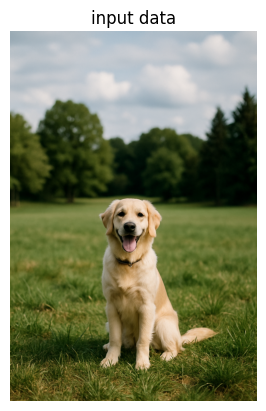

In [19]:
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

''' 適当なinput/target '''
try:
    target = Image.open('/content/drive/MyDrive/ai-physics-lab/VGGPerceptualLoss/dog.png').convert('RGB')
    plt.imshow(target)
    plt.axis("off")
    plt.title('input data')
except FileNotFoundError:
    import numpy as np
    print(f"Error: File not found")
    target = np.zeros((3, 256, 256)) # Set img to None if file not found

# Define a transform to convert the image to a PyTorch tensor
transform = transforms.ToTensor()

# Apply the transform
target = transform(target)
target = target.reshape((1, 3, target.shape[-2], target.shape[-1]))

''' FeatureMaps '''
feature_maps = VGGPerceptualFeatureMaps()

# Lossの計算
input_features, target_features = feature_maps(target, target, [0, 1, 2, 3, 4])

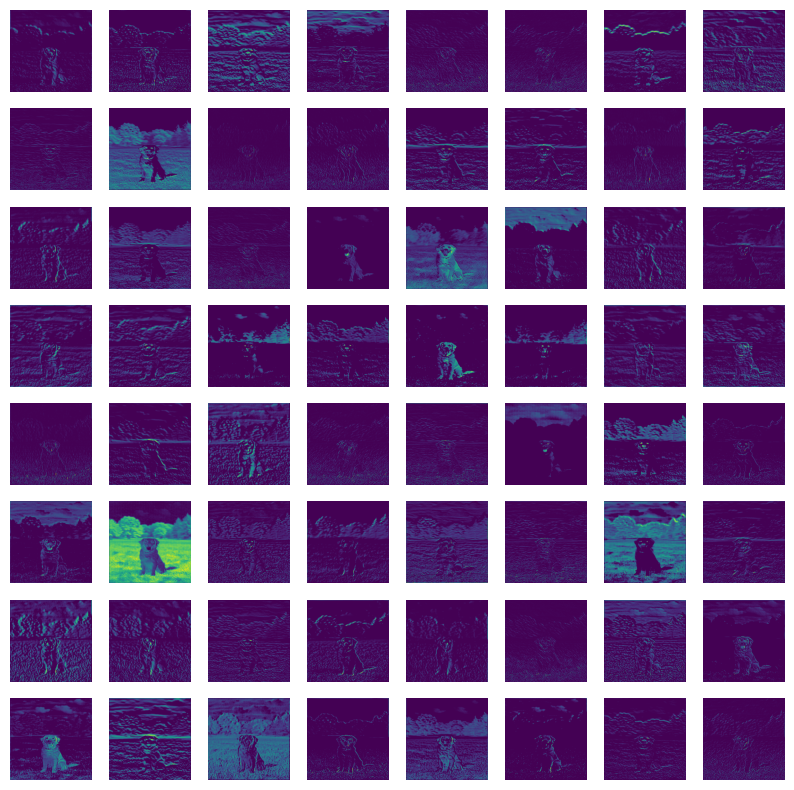

In [ ]:
layer_depth = 0

plt.subplots(8, 8, figsize=(10, 10))
for i in range(64):
  plt.subplot(8, 8, i+1)
  plt.imshow(target_features[layer_depth][0, i])
  plt.axis("off")

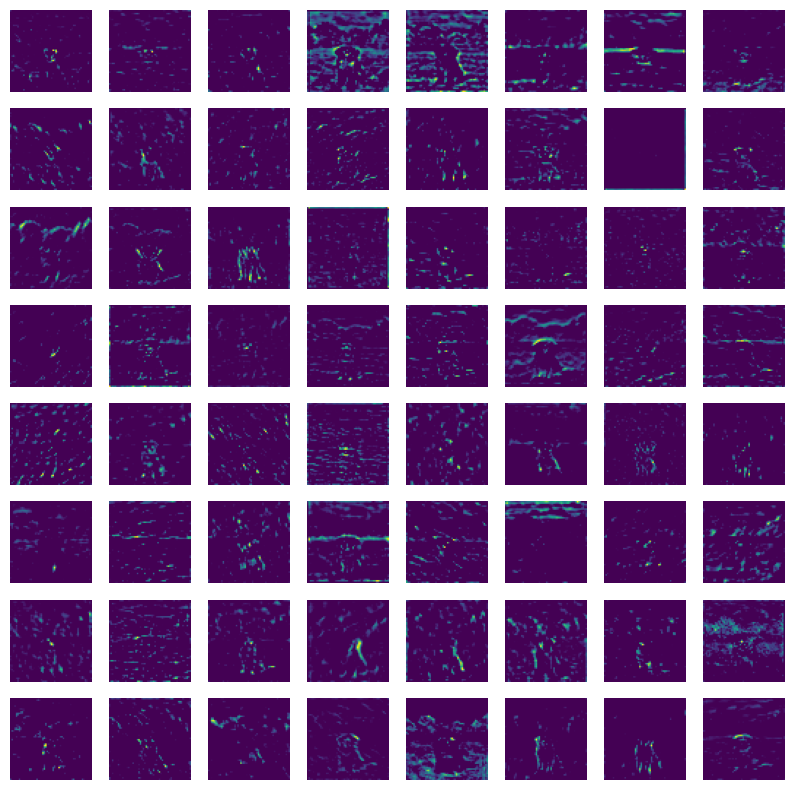

In [ ]:
layer_depth = 2

plt.subplots(8, 8, figsize=(10, 10))
for i in range(64):
  plt.subplot(8, 8, i+1)
  plt.imshow(target_features[layer_depth][0, i])
  plt.axis("off")

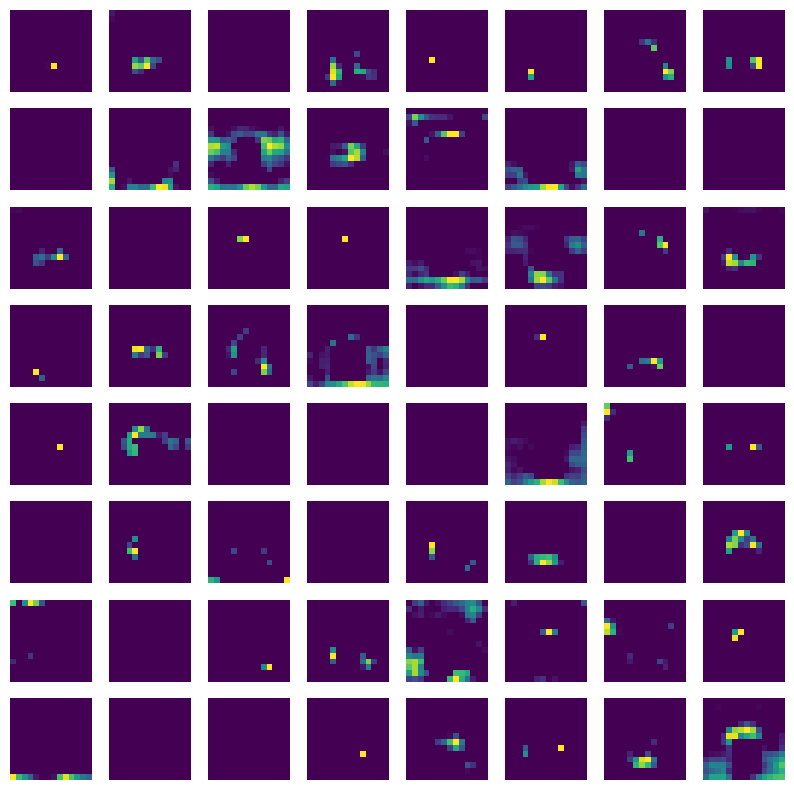

In [ ]:
layer_depth = 4

plt.subplots(8, 8, figsize=(10, 10))
for i in range(64):
  plt.subplot(8, 8, i+1)
  plt.imshow(target_features[layer_depth][0, i])
  plt.axis("off")